#**Packages**

In [1]:
import pandas as pd
import numpy as np
import itertools

import datetime # to show the date and time
import timeit # to calculate the time consumption

import gzip

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from scipy.stats import bernoulli

import random

from scipy.stats import multivariate_normal
from scipy import linalg

import datetime # to show the date and time
import timeit # to calculate the time consumption

from collections import deque
import six
import json

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


#**MovieLens** - **Matrix** **Factorization with surprise**

In [15]:
!pip install scikit-surprise
import surprise  # run 'pip install scikit-surprise' to install surprise

     |████████████████████████████████| 11.8 MB 5.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1623235 sha256=ab38258021f0ba419f8ab0af4175d30857b6cb2cdda8ec543899709d0b27f1e2
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [16]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [17]:
movies_df = pd.read_table('drive/MyDrive/P2/MovieLens-Dataset/10M/movies.dat', sep='::', 
                           names=['MovieID', 'Title', 'Genres'], engine='python')
ratings_df = pd.read_table("drive/MyDrive/P2/MovieLens-Dataset/10M/ratings.dat", sep="::",
                           names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')

In [18]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [20]:
ratings_df['Rating'].unique()

array([5. , 3. , 2. , 4. , 4.5, 3.5, 1. , 1.5, 2.5, 0.5])

In [21]:
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_df[['UserID','MovieID','Rating']], reader)

In [22]:
# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD(n_factors=100)
algorithm.fit(trainset)

In [23]:
idx = []
for i in range(trainset.n_items):
  idx.append(trainset.to_raw_iid(i))

In [ ]:
#to save
np.save('drive/MyDrive/P2/Results/MovieLens/idx_2_CBRAP_BCMABRP', idx)

In [ ]:
# len(ratings_df["UserID"].unique())
# len(movies_df["MovieID"].unique())
# trainset.all_items()
# trainset.n_items
# algorithm.pu.shape
# algorithm.qi.shape
# type(algorithm.pu)
# print(algorithm.pu)
# print(algorithm.qi)

In [24]:
pu_all = algorithm.pu
qi_all = algorithm.qi

#to save
# np.save('drive/MyDrive/P2/Results/MovieLens/pu_all_2_CBRAP_BCMABRP', algorithm.pu)
# np.save('drive/MyDrive/P2/Results/MovieLens/qi_all_2_CBRAP_BCMABRP', algorithm.qi)
#to load
# pu_all = np.load('drive/MyDrive/P2/Results/MovieLens/pu_all_1.npy')
# qi_all = np.load('drive/MyDrive/P2/Results/MovieLens/qi_all_1.npy')

In [25]:
print('#users: ' + str(trainset.n_users))
print('#items: ' + str(trainset.n_items))
print('Shape - user: ' + str(pu_all.shape))
print('shape - item: ' + str(qi_all.shape))

#users: 69878
#items: 10645
Shape - user: (69878, 100)
shape - item: (10645, 100)


In [26]:
action_features = pd.DataFrame(data=qi_all)
action_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.004255,0.071509,0.222180,0.293089,-0.176198,0.069548,0.252270,0.200129,-0.200582,0.101500,0.035466,0.325636,-0.178464,-0.330711,-0.399052,-0.267831,0.384647,-0.306959,-0.024535,0.107565,-0.338531,-0.243208,0.072249,-0.114925,0.012968,-0.043917,0.033970,0.134465,0.118599,-0.064172,0.168380,0.004685,-0.118507,0.423941,-0.087099,-0.558082,-0.226333,-0.135208,0.088075,0.071495,...,0.012255,-0.118011,-0.138239,0.180701,-0.424742,0.300274,-0.006870,-0.139621,-0.095906,0.479269,-0.154152,0.323964,-0.074165,-0.176545,0.216791,-0.192284,0.187062,-0.131794,-0.094311,-0.053263,0.292418,0.086300,0.003217,0.415238,-0.112656,0.010362,-0.007428,0.103340,-0.085783,-0.320682,-0.374828,0.198532,-0.443680,-0.322359,-0.146918,0.246005,-0.068465,-0.069268,0.003386,-0.080310
1,-0.113921,-0.147026,0.036192,0.060066,0.088163,-0.048656,-0.172510,0.081226,-0.018860,0.298990,0.263327,-0.030220,-0.494246,-0.255550,-0.083849,0.181307,0.073567,-0.017699,-0.364426,-0.061325,-0.030072,0.170924,-0.108548,0.095952,-0.128858,0.102766,-0.001961,-0.320269,-0.154720,0.166656,-0.167664,-0.079273,-0.003001,-0.123613,0.097119,0.130665,0.019247,-0.111838,-0.210223,-0.125315,...,0.011391,0.062466,0.232339,-0.040177,0.402371,-0.250709,-0.198194,0.054082,0.443383,0.168942,0.007560,0.058385,0.194181,-0.246713,-0.257785,0.050683,-0.171530,-0.016212,0.437773,0.247910,-0.040661,-0.048912,0.297371,-0.163099,0.135292,-0.025359,0.024235,-0.013369,0.107988,-0.092134,0.163608,0.060368,0.077010,0.028638,0.153315,-0.194692,0.310408,-0.084388,-0.181151,0.025937
2,-0.053804,-0.037383,-0.029528,0.036486,-0.259344,-0.111215,0.148278,0.012176,-0.075523,-0.039604,-0.141361,-0.165685,0.204852,-0.012796,-0.046868,-0.019645,-0.045757,-0.015951,0.330390,-0.105753,0.127296,-0.159498,-0.001631,0.014459,-0.096905,-0.338161,0.102021,-0.113755,0.081731,-0.121428,0.267194,-0.320339,-0.161868,0.295213,-0.101581,-0.113209,-0.120901,0.163679,0.016377,-0.120078,...,0.207797,0.035606,-0.128828,-0.132574,0.069601,-0.071065,-0.048764,0.021770,-0.100177,0.029097,-0.056336,-0.027921,0.106656,-0.033271,-0.171391,-0.026370,-0.090612,-0.068207,-0.079249,0.001499,0.233406,0.193472,-0.047927,0.242875,0.069522,-0.081560,-0.031539,0.274591,0.134888,0.040026,-0.344018,-0.070103,-0.231443,0.236300,0.216209,0.607355,0.047660,-0.043119,-0.043025,0.118510
3,0.047658,-0.254020,0.101810,-0.184620,0.085565,-0.241339,0.302000,0.347007,-0.226488,0.195158,-0.065973,0.251091,-0.079113,-0.767516,-0.013219,-0.045296,0.450416,0.304758,0.143700,0.079375,0.070827,0.127395,-0.129398,0.140722,-0.289847,-0.087968,-0.050493,-0.121325,-0.089733,0.186411,-0.015302,-0.327900,0.212411,0.223858,0.325759,-0.004231,-0.114675,-0.138438,0.216675,0.080768,...,0.161360,-0.144893,0.491843,-0.154764,-0.147191,-0.288599,-0.075186,0.438048,0.000320,-0.078391,0.036229,0.021646,0.138351,0.139804,0.137173,-0.526495,0.319383,-0.004210,-0.186524,0.448505,-0.093004,0.297544,0.326942,-0.430904,0.021437,0.057312,0.182137,0.073046,-0.009803,-0.213630,0.259948,-0.206378,-0.104366,0.027002,0.197804,-0.363393,-0.082586,-0.176898,-0.393605,-0.193134
4,-0.149772,-0.096593,-0.002343,0.020988,-0.030967,0.054383,0.133839,0.028691,0.153836,-0.090044,0.066134,-0.297995,-0.229588,0.399047,0.023764,-0.175977,-0.068167,-0.151387,-0.145253,-0.256783,0.154684,0.077516,0.075086,0.182057,0.110738,-0.064926,0.026824,-0.018519,0.277663,-0.175000,0.004811,-0.039178,-0.112486,0.061851,0.007343,-0.162832,-0.047267,-0.145786,-0.186417,-0.085802,...,-0.196086,0.248860,-0.491253,0.148475,0.109563,0.051821,-0.100717,0.042755,-0.112041,-0.032973,-0.028678,-0.445382,-0.167093,0.130358,-0.258273,0.305374,0.054652,0.094971,0.182057,-0.031908,0.234796,0.070234,0.085023,0.238752,0.037573,0.159126,0.044625,0.012980,-0.313160,-0.298053,0.226824,0.231216,-

In [27]:
action_features.insert(0, 'movieid', idx) #action_features["MovieID"] = idx
action_features

,movieid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2424,-0.004255,0.071509,0.222180,0.293089,-0.176198,0.069548,0.252270,0.200129,-0.200582,0.101500,0.035466,0.325636,-0.178464,-0.330711,-0.399052,-0.267831,0.384647,-0.306959,-0.024535,0.107565,-0.338531,-0.243208,0.072249,-0.114925,0.012968,-0.043917,0.033970,0.134465,0.118599,-0.064172,0.168380,0.004685,-0.118507,0.423941,-0.087099,-0.558082,-0.226333,-0.135208,0.088075,...,0.012255,-0.118011,-0.138239,0.180701,-0.424742,0.300274,-0.006870,-0.139621,-0.095906,0.479269,-0.154152,0.323964,-0.074165,-0.176545,0.216791,-0.192284,0.187062,-0.131794,-0.094311,-0.053263,0.292418,0.086300,0.003217,0.415238,-0.112656,0.010362,-0.007428,0.103340,-0.085783,-0.320682,-0.374828,0.198532,-0.443680,-0.322359,-0.146918,0.246005,-0.068465,-0.069268,0.003386,-0.080310
1,1235,-0.113921,-0.147026,0.036192,0.060066,0.088163,-0.048656,-0.172510,0.081226,-0.018860,0.298990,0.263327,-0.030220,-0.494246,-0.255550,-0.083849,0.181307,0.073567,-0.017699,-0.364426,-0.061325,-0.030072,0.170924,-0.108548,0.095952,-0.128858,0.102766,-0.001961,-0.320269,-0.154720,0.166656,-0.167664,-0.079273,-0.003001,-0.123613,0.097119,0.130665,0.019247,-0.111838,-0.210223,...,0.011391,0.062466,0.232339,-0.040177,0.402371,-0.250709,-0.198194,0.054082,0.443383,0.168942,0.007560,0.058385,0.194181,-0.246713,-0.257785,0.050683,-0.171530,-0.016212,0.437773,0.247910,-0.040661,-0.048912,0.297371,-0.163099,0.135292,-0.025359,0.024235,-0.013369,0.107988,-0.092134,0.163608,0.060368,0.077010,0.028638,0.153315,-0.194692,0.310408,-0.084388,-0.181151,0.025937
2,380,-0.053804,-0.037383,-0.029528,0.036486,-0.259344,-0.111215,0.148278,0.012176,-0.075523,-0.039604,-0.141361,-0.165685,0.204852,-0.012796,-0.046868,-0.019645,-0.045757,-0.015951,0.330390,-0.105753,0.127296,-0.159498,-0.001631,0.014459,-0.096905,-0.338161,0.102021,-0.113755,0.081731,-0.121428,0.267194,-0.320339,-0.161868,0.295213,-0.101581,-0.113209,-0.120901,0.163679,0.016377,...,0.207797,0.035606,-0.128828,-0.132574,0.069601,-0.071065,-0.048764,0.021770,-0.100177,0.029097,-0.056336,-0.027921,0.106656,-0.033271,-0.171391,-0.026370,-0.090612,-0.068207,-0.079249,0.001499,0.233406,0.193472,-0.047927,0.242875,0.069522,-0.081560,-0.031539,0.274591,0.134888,0.040026,-0.344018,-0.070103,-0.231443,0.236300,0.216209,0.607355,0.047660,-0.043119,-0.043025,0.118510
3,39,0.047658,-0.254020,0.101810,-0.184620,0.085565,-0.241339,0.302000,0.347007,-0.226488,0.195158,-0.065973,0.251091,-0.079113,-0.767516,-0.013219,-0.045296,0.450416,0.304758,0.143700,0.079375,0.070827,0.127395,-0.129398,0.140722,-0.289847,-0.087968,-0.050493,-0.121325,-0.089733,0.186411,-0.015302,-0.327900,0.212411,0.223858,0.325759,-0.004231,-0.114675,-0.138438,0.216675,...,0.161360,-0.144893,0.491843,-0.154764,-0.147191,-0.288599,-0.075186,0.438048,0.000320,-0.078391,0.036229,0.021646,0.138351,0.139804,0.137173,-0.526495,0.319383,-0.004210,-0.186524,0.448505,-0.093004,0.297544,0.326942,-0.430904,0.021437,0.057312,0.182137,0.073046,-0.009803,-0.213630,0.259948,-0.206378,-0.104366,0.027002,0.197804,-0.363393,-0.082586,-0.176898,-0.393605,-0.193134
4,1645,-0.149772,-0.096593,-0.002343,0.020988,-0.030967,0.054383,0.133839,0.028691,0.153836,-0.090044,0.066134,-0.297995,-0.229588,0.399047,0.023764,-0.175977,-0.068167,-0.151387,-0.145253,-0.256783,0.154684,0.077516,0.075086,0.182057,0.110738,-0.064926,0.026824,-0.018519,0.277663,-0.175000,0.004811,-0.039178,-0.112486,0.061851,0.007343,-0.162832,-0.047267,-0.145786,-0.186417,...,-0.196086,0.248860,-0.491253,0.148475,0.109563,0.051821,-0.100717,0.042755,-0.112041,-0.032973,-0.028678,-0.445382,-0.167093,0.130358,-0.258273,0.305374,0.054652,0.094971,0.182057,-0.031908,0.234796,0.070234,0.085023,0.238752,0.037573,0.159126,0.044625,0.012980,-0.313160,-0.298053,0.226824,0.231216,-0.142424,-0.041744,-0

In [ ]:
#to save
# action_features.to_csv('drive/MyDrive/P2/Results/MovieLens/action_features_2_CBRAP_BCMABRP.csv', index=False)
#to load
# action_features = pd.read_csv('drive/MyDrive/P2/Results/MovieLens/action_features_2_CBRAP_BCMABRP.csv')

# action_features.head()

In [ ]:
# algorithm.test(testset)
# predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
# accuracy.rmse(predictions)
# RMSE: 0.7724
 
# check the preferences of a particular user
# user_id = 7010
# predicted_ratings = pred_user_rating(user_id)
# pdf = pd.DataFrame(predicted_ratings, columns = ['movies','ratings'])
# pdf.sort_values('ratings', ascending=False, inplace=True)  
# pdf.set_index('movies', inplace=True)
# pdf.head(10)


#**MovieLens 10M - preprocessing**

In [3]:
def movie_preprocessing(movie):
    movie_col = list(movie.columns)
    movie_tag = [doc.split('|') for doc in movie['tag']]
    tag_table = {token: idx for idx, token in enumerate(set(itertools.chain.from_iterable(movie_tag)))}
    movie_tag = pd.DataFrame(movie_tag)
    tag_table = pd.DataFrame(tag_table.items())
    tag_table.columns = ['Tag', 'Index']

    # use one-hot encoding for movie genres (here called tag)
    tag_dummy = np.zeros([len(movie), len(tag_table)])

    for i in range(len(movie)):
        for j in range(len(tag_table)):
            if tag_table['Tag'][j] in list(movie_tag.iloc[i, :]):
                tag_dummy[i, j] = 1

    # combine the tag_dummy one-hot encoding table to original movie files
    movie = pd.concat([movie, pd.DataFrame(tag_dummy)], 1)
    movie_col.extend(['tag' + str(i) for i in range(len(tag_table))])
    movie.columns = movie_col
    movie = movie.drop('tag', 1)
    return movie


def feature_extraction(data):
    # actions: we use top 1000 movies as our actions for recommendations
    actions = data.groupby('movie_id').size().sort_values(ascending=False)[:1000]
    actions = list(actions.index)

    # user_feature: tags they've watched for non-top-1000 movies normalized per user
    user_feature = data[~data['movie_id'].isin(actions)]
    user_feature = user_feature.groupby('user_id').aggregate(np.sum)
    user_feature = user_feature.drop(['movie_id', 'rating', 'timestamp'], 1)
    user_feature = user_feature.div(user_feature.sum(axis=1), axis=0)

    # streaming_batch: the result for testing bandit algrorithms
    top50_data = data[data['movie_id'].isin(actions)]
    top50_data = top50_data.sort_values('timestamp', ascending=1)
    streaming_batch = top50_data['user_id']

    # reward_list: if rating >=3, the user will watch the movie
    top50_data['reward'] = np.where(top50_data['rating'] >= 3, 1, 0)
    reward_list = top50_data[['user_id', 'movie_id', 'reward']]
    reward_list = reward_list[reward_list['reward'] == 1]
    return streaming_batch, user_feature, actions, reward_list

def main_data():
    # read and preprocess the movie data
    movie = pd.read_table('drive/MyDrive/P2/MovieLens-Dataset/10M/movies.dat', sep='::', names=['movie_id', 'movie_name', 'tag'], engine='python')
    movie = movie_preprocessing(movie)

    # read the ratings data and merge it with movie data
    rating = pd.read_table("drive/MyDrive/P2/MovieLens-Dataset/10M/ratings.dat", sep="::",
                           names=["user_id", "movie_id", "rating", "timestamp"], engine='python')
    data = pd.merge(rating, movie, on="movie_id")

    # extract feature from our data set
    streaming_batch, user_feature, actions, reward_list = feature_extraction(data)
    streaming_batch.to_csv("streaming_batch.csv", sep='\t', index=False)
    user_feature.to_csv("user_feature.csv", sep='\t')
    pd.DataFrame(actions, columns=['movie_id']).to_csv("actions.csv", sep='\t', index=False)
    reward_list.to_csv("reward_list.csv", sep='\t', index=False)

    action_context = movie[movie['movie_id'].isin(actions)]
    action_context.to_csv("action_context.csv", sep='\t', index = False)

    movie.to_csv("movie.csv", sep='\t', index=False)

__name__ = '__main__'
if __name__ == '__main__':
    main_data()

In [4]:
# pd.read_table("drive/MyDrive/P2/MovieLens-Dataset/10M/tags.dat", sep="::", engine='python')

In [5]:
def get_data():
    # streaming_batch = pd.read_csv('streaming_batch.csv', sep='\t', names=['user_id'], engine='c')
    streaming_batch = pd.read_csv('streaming_batch.csv', sep='\t', header=0, engine='c')
    user_feature = pd.read_csv('user_feature.csv', sep='\t', header=0, index_col=0, engine='c')
    actions_id = list(pd.read_csv('actions.csv', sep='\t', header=0, engine='c')['movie_id'])
    reward_list = pd.read_csv('reward_list.csv', sep='\t', header=0, engine='c')
    action_context = pd.read_csv('action_context.csv', sep='\t', header=0, engine='c')

    movie = pd.read_csv('movie.csv', sep='\t', header=0, engine='c')

    return streaming_batch, user_feature, actions_id, reward_list, action_context


# reward_list --> user_id, movie_id, reward, only ones are kept
# user_feature --> users_id, tag0 ..., tag19, only unique users are kept # user_feature.index = user_id

#it is better to save the above outputs and use the saved ones instead of preprocessing again

In [6]:
streaming_batch, user_feature, actions, reward_list, action_context = get_data() #, movie
# streaming_batch_small = streaming_batch.iloc[0:10000]

In [29]:
streaming_batch

,user_id
0,36955
1,36955
2,36955
3,35139
4,35435
...,...
6747778,63100
6747779,63100
6747780,63100
6747781,63100


In [7]:
action_context

,movie_id,movie_name,tag0,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19
0,1,Toy Story (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2,Jumanji (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,Grumpier Old Men (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,Heat (1995),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48780,"Prestige, The (2006)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,49272,Casino Royale (2006),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
997,51662,300 (2007),0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,54286,"Bourne Ultimatum, The (2007)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
user_feature

,tag0,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19
user_id,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000
3,0.032258,0.000000,0.000000,0.000000,0.193548,0.000000,0.096774,0.000000,0.000000,0.000000,0.032258,0.000000,0.354839,0.000000,0.032258,0.0,0.064516,0.000000,0.000000,0.193548
5,0.000000,0.000000,0.037037,0.000000,0.148148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.037037,0.0,0.000000,0.000000,0.000000,0.111111
6,0.000000,0.263158,0.000000,0.000000,0.157895,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.157895,0.000000,0.000000,0.0,0.157895,0.000000,0.000000,0.157895
7,0.121951,0.036585,0.000000,0.000000,0.085366,0.000000,0.000000,0.109756,0.024390,0.024390,0.073171,0.000000,0.158537,0.000000,0.085366,0.0,0.109756,0.012195,0.073171,0.085366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71563,0.000000,0.142857,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.190476,0.000000,0.190476,0.0,0.285714,0.000000,0.047619,0.047619
71564,0.000000,0.086957,0.000000,0.021739,0.108696,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,0.239130,0.000000,0.108696,0.0,0.130435,0.000000,0.021739,0.260870
71565,0.023529,0.070588,0.011765,0.047059,0.035294,0.011765,0.058824,0.000000,0.035294,0.152941,0.011765,0.023529,0.282353,0.023529,0.000000,0.0,0.070588,0.000000,0.058824,0.082353


In [13]:
#Some Statistics
len(streaming_batch['user_id'].unique())
len(actions)
reward_list #.head()
# reward_list[reward_list['user_id'] == 36955].head()
# streaming_batch.head()
# len(reward_list[reward_list['user_id'] == streaming_batch.iloc[550, 0]]['movie_id']) #To check the number of watched arms 
# len(np.array(user_feature[user_feature.index == streaming_batch.iloc[0, 0]])) 

,user_id,movie_id,reward
0,36955,1079,1
1,36955,47,1
2,36955,21,1
3,35139,19,1
4,35435,21,1
...,...,...,...
5771606,63100,2124,1
5771607,63100,4816,1
5771608,63100,410,1
5771609,63100,231,1


In [14]:
#To check all actions (The chosen 1000! actions) include in action_features (in training set!)
action_context
# len(action_features[action_features['movieid'].isin(actions)])

,movie_id,movie_name,tag0,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19
0,1,Toy Story (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2,Jumanji (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,Grumpier Old Men (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,Heat (1995),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48780,"Prestige, The (2006)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,49272,Casino Royale (2006),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
997,51662,300 (2007),0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,54286,"Bourne Ultimatum, The (2007)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#To check all users (in training set) include in user_features (that are constructed in preprocessing)
# idx_user = []
# for i in range(trainset.n_users):
#   idx_user.append(trainset.to_raw_uid(i))
# len(idx_user)
# user_feature
# streaming_batch[streaming_batch['user_id'].isin(idx_user)] #[36955]
# len(user_feature.index.isin(idx_user))
# len(user_feature.index == streaming_batch.iloc[2, 0])
# user_feature[user_feature.index.isin(idx_user)]
# np.array(user_feature[user_feature.index == streaming_batch.iloc[2, 0]])

In [ ]:
#How many users are there in our experiment?
jjj = 100000 #?
len(streaming_batch.iloc[0:jjj]['user_id'].unique())

318

#**Policies with Class**

In [ ]:
def policy_generation(bandit, actions, reduct_matrix):
    org_dim = 120
    red_dim = 60
    if bandit == 'BCMABRP':
        policy = BCMABRP(org_dim, red_dim, reduct_matrix, delta=0.5, R=0.01, lambd=0.5)
        policy.initialization()
    elif bandit == 'CBRAP':
        policy = CBRAP(org_dim, red_dim, reduct_matrix, alpha = 0.5)
        policy.initialization()
    elif bandit == 'LinearTS':
        policy = LinearTS(org_dim, delta=0.5, R=0.01, epsilon=0.5)
        policy.initialization()
    elif bandit == 'LinUCB':
        policy = LinUCB(org_dim, alpha=0.5)
        policy.initialization()
    elif bandit == 'random':
        policy = 0

    return policy

def policy_evaluation(policy, bandit, streaming_batch, user_feature, reward_list, actions, action_features, times): 
    
    seq_error = np.zeros(shape=(times, 1))
    
    action_context_dict = {}
    for action_id in actions: #movie_id :)
        # action_context_dict[action_id] = np.array(action_context[action_context['movie_id'] == action_id])[0][2:]
        action_context_dict[action_id] = np.array(action_features[action_features['movieid'] == action_id])[0][1:]    
    if bandit in ['BCMABRP', 'CBRAP', 'LinearTS', 'LinUCB']:
        # for t in range(times):
        j = 0 #
        t = 0 #
        while t < times: #
            j = j+1 #
            if len(np.array(user_feature[user_feature.index == streaming_batch.iloc[j, 0]])) == 0: #
                print("time with no user:" + str(j))
                continue
            feature = np.array(user_feature[user_feature.index == streaming_batch.iloc[j, 0]])[0] #
            full_context = {}
            for action_id in actions: #movie_id :)
                full_context[action_id] = np.append(action_context_dict[action_id], feature) #feature
            # history_m, action_t = policy.get_action(full_context, 1)
            action_t = policy.get_action(full_context, 1)
            watched_list = reward_list[reward_list['user_id'] == streaming_batch.iloc[j, 0]] #
            if action_t not in list(watched_list['movie_id']):
                
                policy.reward(0.0)
                if t == 0:
                    seq_error[t] = 1.0
                else:
                    seq_error[t] = seq_error[t - 1] + 1.0

            else:
                
                policy.reward(1.0)
                if t > 0:
                    seq_error[t] = seq_error[t - 1]

            # policy.update_model_param((B, f))
            t = t+1
        print("jj = " + str(j))
    elif bandit == 'random':
        # for t in range(times):
        j = 0
        t = 0
        while t < times:
            j = j+1
            if len(np.array(user_feature[user_feature.index == streaming_batch.iloc[j, 0]])) == 0:
                print("time in random with no user:" + str(j))
                continue
            action_t = actions[np.random.randint(0, len(actions)-1)]
            watched_list = reward_list[reward_list['user_id'] == streaming_batch.iloc[j, 0]]
            if action_t not in list(watched_list['movie_id']):
                if t == 0:
                    seq_error[t] = 1.0
                else:
                    seq_error[t] = seq_error[t - 1] + 1.0
            else:
                if t > 0:
                    seq_error[t] = seq_error[t - 1]
            t = t+1
    return seq_error


In [ ]:
class CBRAP():

    def __init__(self, context_dimension, red_dim, reduct_matrix, alpha):
        super(CBRAP, self).__init__()
        self.context_dimension = context_dimension
        self.red_dim = red_dim
        self.alpha = alpha

        self.model_param_memory = deque(maxlen = 1)
        self.history_memory = deque(maxlen = 1)

        # reduction_matrix = np.zeros((context_dimension, red_dim))
        # for i in range(context_dimension):
        #     for j in range(red_dim):
        #         random_value = random.gauss(0, 1) # standard random matrix with N(0, 1)
        #         reduction_matrix[i,j] = random_value
        # self.reduction_matrix = reduction_matrix
        self.reduction_matrix = reduct_matrix

    def update_history(self, hst): # (context, recommendatin_id)
        self.history_memory.append(hst)
        # return self.history_memory

    def update_model_param(self, param): # (A, b, inv_A)
        self.model_param_memory.append(param)

    def initialization(self):
        A = np.identity(self.red_dim)
        # theta = np.zeros((self.red_dim, 1))
        b = np.zeros((self.red_dim, 1))
        inv_A = np.linalg.inv(A) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((A, b, inv_A))
        # print(self.model_param_memory)

    def get_score(self, context):
        action_ids = list(six.viewkeys(context))
        context_array = np.asarray([context[action_id] for action_id in action_ids])
        context_array = context_array.dot(self.reduction_matrix)
        
        A = self.model_param_memory[0][0]
        b = self.model_param_memory[0][1]
        inv_A = self.model_param_memory[0][2]
        # mu_hat = np.matmul(np.linalg.inv(B), f)
        A = A.astype(np.float32)
        theta = (inv_A).dot(b).astype(np.float32) # (np.linalg.inv(A)).dot(b).astype(np.float32)
        theta = np.reshape(theta, (-1,1))
        estimated_reward_array = context_array.dot(theta)
        # score_array = context_array.dot()

        estimated_reward_dict = {}
        uncertainty_dict = {}
        score_dict = {}
        # for action_id in action_ids:
        for action_id, estimated_reward, action_context in zip(action_ids, estimated_reward_array, context_array):
            
            # action_context = np.reshape(context[action_id], (-1, 1))
            # action_context = context[action_id].dot(self.reduction_matrix)
            action_context = np.reshape(action_context, (-1, 1))
            action_context = action_context.astype(np.float32)

            # estimated_reward[action_id] = float(theta[action_id].T.dot(action_context))
            estimated_reward_dict[action_id] = float(estimated_reward)
            # uncertainty_dict[action_id] = float(self.alpha * np.sqrt(action_context.T.dot(np.linalg.inv(A)).dot(action_context)))
            uncertainty_dict[action_id] = float(self.alpha * np.sqrt(action_context.T.dot(inv_A).dot(action_context)))
            score_dict[action_id] = (estimated_reward_dict[action_id] + uncertainty_dict[action_id])

        return estimated_reward_dict, uncertainty_dict, score_dict

    def get_action(self, context, n_actions=1):

        # if not isinstance(context, dict):
        #     raise ValueError( "LinUCB requires context dict for all actions!")

        estimated_reward, uncertainty, score = self.get_score(context)
        recommendation_id = max(score, key=score.get)
        self.update_history((context, recommendation_id))
        return recommendation_id

    # def reward(self, history_m, rewards):
    def reward(self, reward_t):

        # context = history_m[0][0]
        # recommendation_id = history_m[0][1]
        context = self.history_memory[0][0]
        recommendation_id = self.history_memory[0][1]
        A = self.model_param_memory[0][0]
        b = self.model_param_memory[0][1]
        # inv_A = self.model_param_memory[0][2]

        # for action_id, reward in six.viewitems(rewards):
        # context_t = np.reshape(context[recommendation_id], (-1, 1))
        context_t = context[recommendation_id].dot(self.reduction_matrix)
        context_t = np.reshape(context_t, (-1, 1))
        A = A + context_t.dot(context_t.T)
        A = A.astype(np.float32)

        b = b + reward_t * context_t
        # theta = np.linalg.inv(B).dot(f)
        inv_A = np.linalg.inv(A) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((A, b, inv_A))
        # print(self.model_param_memory)
        # print("#############################################")


In [ ]:
class BCMABRP():

    def __init__(self, context_dimension, red_dim, reduct_matrix, delta=0.5, R=0.01, lambd=0.5):
        super(BCMABRP, self).__init__()
        self.context_dimension = context_dimension
        self.red_dim = red_dim
        self.random_state = np.random.RandomState()
        self.lambd = lambd

        # # 0 < delta < 1
        # if not isinstance(delta, float):
        #     raise ValueError("delta should be float")
        # elif (delta < 0) or (delta >= 1):
        #     raise ValueError("delta should be in (0, 1]")
        # else:
        #     self.delta = delta

        # # R > 0
        # if not isinstance(R, float):
        #     raise ValueError("R should be float")
        # elif R <= 0:
        #     raise ValueError("R should be positive")
        # else:
        #     self.R = R  # pylint: disable=invalid-name

        # # 0 < epsilon < 1
        # if not isinstance(epsilon, float):
        #     raise ValueError("epsilon should be float")
        # elif (epsilon < 0) or (epsilon > 1):
        #     raise ValueError("epsilon should be in (0, 1)")
        # else:
        #     self.epsilon = epsilon

        # self.nu = R * np.sqrt(red_dim*np.log((2 + (2/lambd)) / delta))
        self.nu = 0.5 #0.2 #1.5 #1
        
        self.model_param_memory = deque(maxlen = 1)
        self.history_memory = deque(maxlen = 1)

        # reduction_matrix = np.zeros((context_dimension, red_dim))
        # for i in range(context_dimension):
        #     for j in range(red_dim):
        #         random_value = random.gauss(0, 1) # standard random matrix with N(0, 1)
        #         reduction_matrix[i,j] = random_value
        # self.reduction_matrix = reduction_matrix
        self.reduction_matrix = reduct_matrix

    def update_history(self, hst): # (context, recommendatin_id)
        self.history_memory.append(hst)
        # return self.history_memory

    def update_model_param(self, param): # (B, f, inv_B)
        self.model_param_memory.append(param)

    def initialization(self):
        B = self.lambd*np.identity(self.red_dim)
        # psi_hat = np.zeros((self.red_dim, 1))
        f = np.zeros((self.red_dim, 1))
        inv_B = np.linalg.inv(B) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((B, f, inv_B))
        # print(self.model_param_memory)

    def get_score(self, context):
        action_ids = list(six.viewkeys(context))
        context_array = np.asarray([context[action_id] for action_id in action_ids])
        context_array = context_array.dot(self.reduction_matrix)
        
        B = self.model_param_memory[0][0]
        f = self.model_param_memory[0][1]
        inv_B = self.model_param_memory[0][2]
        # psi_hat = np.matmul(np.linalg.inv(B), f)
        B = B.astype(np.float32)
        psi_hat = (inv_B).dot(f).astype(np.float32) #(np.linalg.inv(B)).dot(f).astype(np.float32)
        # psi_hat = psi_hat.astype(np.float32)
        # psi_tilde = self.random_state.multivariate_normal(psi_hat.flat, self.nu**2 * np.linalg.inv(B)) #[..., np.newaxis]
        psi_tilde = self.random_state.multivariate_normal(psi_hat.flat, self.nu**2 * inv_B) #[..., np.newaxis]
        psi_tilde = np.reshape(psi_tilde, (-1,1))
        estimated_reward_array = context_array.dot(psi_hat)
        score_array = context_array.dot(psi_tilde)

        estimated_reward_dict = {}
        uncertainty_dict = {}
        score_dict = {}
        for action_id, estimated_reward, score in zip(action_ids, estimated_reward_array, score_array):
            estimated_reward_dict[action_id] = float(estimated_reward)
            score_dict[action_id] = float(score)
            uncertainty_dict[action_id] = float(score - estimated_reward)
        return estimated_reward_dict, uncertainty_dict, score_dict #, context_array

    def get_action(self, context, n_actions=1):

        # if not isinstance(context, dict):
        #     raise ValueError( "LinThompSamp requires context dict for all actions!")

        estimated_reward, uncertainty, score = self.get_score(context)
        recommendation_id = max(score, key=score.get)
        self.update_history((context, recommendation_id))
        return recommendation_id

    # def reward(self, history_m, rewards):
    def reward(self, reward_t):

        # context = history_m[0][0]
        # recommendation_id = history_m[0][1]
        context = self.history_memory[0][0]
        recommendation_id = self.history_memory[0][1]
        B = self.model_param_memory[0][0]
        f = self.model_param_memory[0][1]
        # inv_B = self.model_param_memory[0][2]

        # for action_id, reward in six.viewitems(rewards):
        context_t = context[recommendation_id].dot(self.reduction_matrix)
        context_t = np.reshape(context_t, (-1, 1))
        B = B + context_t.dot(context_t.T)
        B = B.astype(np.float32)

        f = f + reward_t * context_t
        # psi_hat = np.linalg.inv(B).dot(f)
        inv_B = np.linalg.inv(B) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((B, f, inv_B))
        # print(self.model_param_memory)
        


In [ ]:
class LinearTS():

    def __init__(self, context_dimension, delta=0.5, R=0.01, epsilon=0.5):
        super(LinearTS, self).__init__()
        self.context_dimension = context_dimension
        self.random_state = np.random.RandomState()

        # # 0 < delta < 1
        # if not isinstance(delta, float):
        #     raise ValueError("delta should be float")
        # elif (delta < 0) or (delta >= 1):
        #     raise ValueError("delta should be in (0, 1]")
        # else:
        #     self.delta = delta

        # # R > 0
        # if not isinstance(R, float):
        #     raise ValueError("R should be float")
        # elif R <= 0:
        #     raise ValueError("R should be positive")
        # else:
        #     self.R = R  # pylint: disable=invalid-name

        # # 0 < epsilon < 1
        # if not isinstance(epsilon, float):
        #     raise ValueError("epsilon should be float")
        # elif (epsilon < 0) or (epsilon > 1):
        #     raise ValueError("epsilon should be in (0, 1)")
        # else:
        #     self.epsilon = epsilon

        # self.nu = R * np.sqrt((24 / epsilon)*self.context_dimension*np.log(1 / delta))
        self.nu = 0.5

        self.model_param_memory = deque(maxlen = 1)
        self.history_memory = deque(maxlen = 1)

    def update_history(self, hst): # (context, recommendatin_id)
        self.history_memory.append(hst)
        # return self.history_memory

    def update_model_param(self, param): # (B, f, inv_B)
        self.model_param_memory.append(param)

    def initialization(self):
        B = np.identity(self.context_dimension)
        # mu_hat = np.zeros((self.context_dimension, 1))
        f = np.zeros((self.context_dimension, 1))
        inv_B = np.linalg.inv(B) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((B, f, inv_B))
        # print(self.model_param_memory)

    def get_score(self, context):
        action_ids = list(six.viewkeys(context))
        context_array = np.asarray([context[action_id] for action_id in action_ids])
        
        B = self.model_param_memory[0][0]
        f = self.model_param_memory[0][1]
        inv_B = self.model_param_memory[0][2]
        # mu_hat = np.matmul(np.linalg.inv(B), f)
        B = B.astype(np.float32)
        mu_hat = (inv_B).dot(f).astype(np.float32) #(np.linalg.inv(B)).dot(f).astype(np.float32)
        # mu_hat = mu_hat.astype(np.float32)
        # mu_tilde = self.random_state.multivariate_normal(mu_hat.flat, self.nu**2 * np.linalg.inv(B)) #[..., np.newaxis]
        mu_tilde = self.random_state.multivariate_normal(mu_hat.flat, self.nu**2 * inv_B) #[..., np.newaxis]
        mu_tilde = np.reshape(mu_tilde, (-1,1))
        estimated_reward_array = context_array.dot(mu_hat)
        score_array = context_array.dot(mu_tilde)

        estimated_reward_dict = {}
        uncertainty_dict = {}
        score_dict = {}
        for action_id, estimated_reward, score in zip(action_ids, estimated_reward_array, score_array):
            estimated_reward_dict[action_id] = float(estimated_reward)
            score_dict[action_id] = float(score)
            uncertainty_dict[action_id] = float(score - estimated_reward)
        return estimated_reward_dict, uncertainty_dict, score_dict

    def get_action(self, context, n_actions=1):

        # if not isinstance(context, dict):
        #     raise ValueError( "LinThompSamp requires context dict for all actions!")

        estimated_reward, uncertainty, score = self.get_score(context)
        recommendation_id = max(score, key=score.get)
        self.update_history((context, recommendation_id))
        return recommendation_id

    # def reward(self, history_m, rewards):
    def reward(self, reward_t):

        # context = history_m[0][0]
        # recommendation_id = history_m[0][1]
        context = self.history_memory[0][0]
        recommendation_id = self.history_memory[0][1]
        B = self.model_param_memory[0][0]
        f = self.model_param_memory[0][1]
        # inv_B = self.model_param_memory[0][2]

        # for action_id, reward in six.viewitems(rewards):
        context_t = np.reshape(context[recommendation_id], (-1, 1))
        B = B + context_t.dot(context_t.T)
        B = B.astype(np.float32)

        f = f + reward_t * context_t
        # mu_hat = np.linalg.inv(B).dot(f)
        inv_B = np.linalg.inv(B) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((B, f, inv_B))
        # print(self.model_param_memory)
        


In [ ]:
class LinUCB():

    def __init__(self, context_dimension, alpha=0.5):
        super(LinUCB, self).__init__()
        self.context_dimension = context_dimension
        self.alpha = alpha

        self.model_param_memory = deque(maxlen = 1)
        self.history_memory = deque(maxlen = 1)

    def update_history(self, hst): # (context, recommendatin_id)
        self.history_memory.append(hst)
        # return self.history_memory

    def update_model_param(self, param): # (A, b, inv_A)
        self.model_param_memory.append(param)

    def initialization(self):
        A = np.identity(self.context_dimension)
        # mu_hat = np.zeros((self.context_dimension, 1))
        b = np.zeros((self.context_dimension, 1))
        inv_A = np.linalg.inv(A) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((A, b, inv_A))
        # print(self.model_param_memory)

    def get_score(self, context):
        action_ids = list(six.viewkeys(context))
        context_array = np.asarray([context[action_id] for action_id in action_ids])
        
        A = self.model_param_memory[0][0]
        b = self.model_param_memory[0][1]
        inv_A = self.model_param_memory[0][2]
        # mu_hat = np.matmul(np.linalg.inv(B), f)
        A = A.astype(np.float32)
        theta = (inv_A).dot(b).astype(np.float32) # (np.linalg.inv(A)).dot(b).astype(np.float32)
        theta = np.reshape(theta, (-1,1))
        estimated_reward_array = context_array.dot(theta)
        # score_array = context_array.dot()

        estimated_reward_dict = {}
        uncertainty_dict = {}
        score_dict = {}
        # for action_id in action_ids:
        for action_id, estimated_reward in zip(action_ids, estimated_reward_array):
            
            action_context = np.reshape(context[action_id], (-1, 1))
            action_context = action_context.astype(np.float32)

            # estimated_reward[action_id] = float(theta[action_id].T.dot(action_context))
            estimated_reward_dict[action_id] = float(estimated_reward)
            # uncertainty_dict[action_id] = float(self.alpha * np.sqrt(action_context.T.dot(np.linalg.inv(A)).dot(action_context)))
            uncertainty_dict[action_id] = float(self.alpha * np.sqrt(action_context.T.dot(inv_A).dot(action_context)))
            score_dict[action_id] = (estimated_reward_dict[action_id] + uncertainty_dict[action_id])

        return estimated_reward_dict, uncertainty_dict, score_dict

    def get_action(self, context, n_actions=1):

        # if not isinstance(context, dict):
        #     raise ValueError( "LinUCB requires context dict for all actions!")

        estimated_reward, uncertainty, score = self.get_score(context)
        recommendation_id = max(score, key=score.get)
        self.update_history((context, recommendation_id))
        return recommendation_id

    # def reward(self, history_m, rewards):
    def reward(self, reward_t):

        # context = history_m[0][0]
        # recommendation_id = history_m[0][1]
        context = self.history_memory[0][0]
        recommendation_id = self.history_memory[0][1]
        A = self.model_param_memory[0][0]
        b = self.model_param_memory[0][1]
        # inv_A = self.model_param_memory[0][2]

        # for action_id, reward in six.viewitems(rewards):
        context_t = np.reshape(context[recommendation_id], (-1, 1))
        A = A + context_t.dot(context_t.T)
        A = A.astype(np.float32)

        b = b + reward_t * context_t
        # theta = np.linalg.inv(B).dot(f)
        inv_A = np.linalg.inv(A) #.astype(np.float32)
        # print(self.model_param_memory)
        self.update_model_param((A, b, inv_A))
        # print(self.model_param_memory)
        


In [ ]:
org_dim = 120
red_dim = 60
reduct_matrix = np.zeros((org_dim, red_dim))
for i in range(org_dim):
    for j in range(red_dim):
        random_value = random.gauss(0, 1) # standard random matrix with N(0, 1)
        reduct_matrix[i,j] = random_value
        
#to save and load 
np.save('drive/MyDrive/P2/Results/MovieLens/reduct_matrix_60_2', reduct_matrix)
# reduct_matrix = np.load('drive/MyDrive/P2/Results/MovieLens/reduct_matrix_1.npy')

In [ ]:
def regret_calculation(seq_error):
    t = len(seq_error)
    regret = [x / y for x, y in zip(seq_error, range(1, t + 1))]
    return regret

def main(action_features, reduct_matrix):
    streaming_batch, user_feature, actions, reward_list, action_context = get_data()
    # streaming_batch_small = streaming_batch.iloc[0:10000]
    times = 10000
    seq_rew = np.arange(times) + 1
    seq_rew = seq_rew.reshape(times,1)
    # conduct analyses
    num_rep = 5
    experiment_bandit = ['BCMABRP', 'CBRAP', 'LinearTS', 'LinUCB', 'random'] 
    results = {}
    cum_results = {}
    time_all_dict = {}
    
    i = 0
    for bandit in experiment_bandit:
        print(bandit)
        regret_all, reward_all, final_rew_all, time_all = [], [], [], []
        for j in range(num_rep):
            #print(datetime.datetime.now())
            timeBegin = timeit.default_timer()
            policy = policy_generation(bandit, actions, reduct_matrix)
            
            seq_error = policy_evaluation(policy, bandit, streaming_batch, user_feature, reward_list, 
                                      actions, action_features, times)
            # regret_all.append(regret_calculation(seq_error))
            regret_all.append(seq_error)
            timeEnd = timeit.default_timer()
            
            #print(datetime.datetime.now())
            #print("Time needed for ...: \n" + str(timeEnd - timeBegin))
            time_all.append(timeEnd - timeBegin)
            # print(seq_error)
            # print(seq_rew - seq_error)
            # reward_all.append(seq_rew - seq_error)
            final_rew_all.append(times - seq_error[times-1])
        
        # print(final_rew_all)
        # print(np.mean(final_rew_all))
        # print(np.var(final_rew_all))
        # regret_avg = np.mean(regret_all, axis = 0) #of size times
        # regret_var = np.var(regret_all, axis = 0)
        # print(regret_avg.shape)
        # print(regret_var.shape)
        
        results[bandit] = [np.mean(time_all)]
        results[bandit].append(np.mean(final_rew_all)) #average of final regret for n rep
        results[bandit].append(np.var(final_rew_all))

        time_all_dict[bandit] = time_all
        cum_results[bandit] = regret_all
        

    print("Done!")
    return results, cum_results, time_all_dict

results, cum_results, time_all_dict = main(action_features, reduct_matrix) #seq_error, final_rew_all



NameError: ignored

In [ ]:
np.save('drive/MyDrive/P2/Results/MovieLens/regret_all_BCMABRP_60_2', np.array(np.array(cum_results['BCMABRP'])))
json.dump(results, open( "drive/MyDrive/P2/Results/MovieLens/results_60_BCMABRP_2.json", 'w' ) )
json.dump(time_all_dict, open( "drive/MyDrive/P2/Results/MovieLens/time_all_dict_60_BCMABRP_2.json", 'w' ) )

# np.save('drive/MyDrive/P2/Results/MovieLens/regret_all_CBRAP_60_2', np.array(np.array(cum_results['CBRAP'])))
# json.dump(results, open( "drive/MyDrive/P2/Results/MovieLens/results_60_CBRAP_2.json", 'w' ) )
# json.dump(time_all_dict, open( "drive/MyDrive/P2/Results/MovieLens/time_all_dict_60_CBRAP_2.json", 'w' ) )


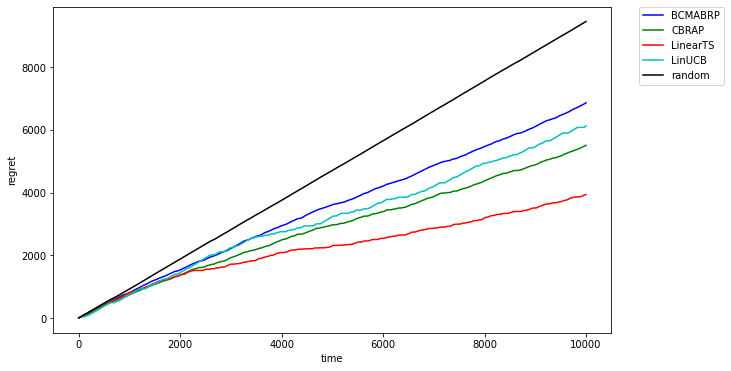

In [ ]:
experiment_bandit = ['BCMABRP', 'CBRAP', 'LinearTS', 'LinUCB', 'random']
col = ['b', 'g', 'r', 'c', 'k', 'm', 'y']
times = 10000
i = 0
fig = plt.figure(figsize=[10, 6])
for bandit in experiment_bandit:
    # trend = regret_calculation(regret_all_BCMABRP[0]) #np.mean(cum_results[bandit][1], axis=0)
    trend = np.mean(cum_results[bandit], axis =0) #cum_results[bandit][0]
    plt.plot(range(times), trend, c=col[i], ls='-', label=bandit)
    plt.xlabel('time')
    plt.ylabel('regret')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axes = plt.gca()
    # axes.set_ylim([0, 1])
    #plt.title("Regret Bound with respect to T")
    i += 1
plt.show()

In [ ]:
fig.savefig("drive/MyDrive/P2/Results/Plot.png", format = 'png', dpi = 300)

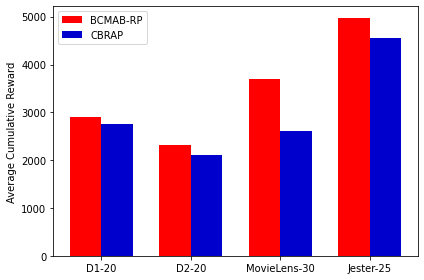

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['D1-20', 'D2-20', 'MovieLens-30', 'Jester-25']
rew_BCMABRP = [2903.6, 2312, 3700.6, 4967]
rew_CBRAP = [2749, 2110, 2614, 4547]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rew_BCMABRP, width, color = 'red', label='BCMAB-RP')
rects2 = ax.bar(x + width/2, rew_CBRAP, width, color = 'mediumblue', label='CBRAP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Cumulative Reward')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

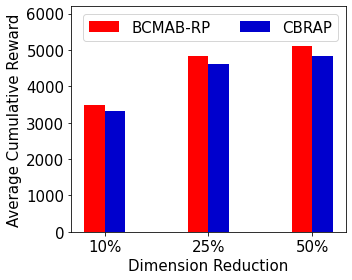

In [ ]:
#MovieLens Results
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['10%', '25%', '50%']
rew_BCMABRP = [3498.2, 4844.0, 5102.2]
rew_CBRAP = [3325.0, 4624.0, 4842.0]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(5,4))
rects1 = ax.bar(x - width/2, rew_BCMABRP, width, color = 'red', label='BCMAB-RP')
rects2 = ax.bar(x + width/2, rew_CBRAP, width, color = 'mediumblue', label='CBRAP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Cumulative Reward', fontsize=15)
ax.set_xlabel('Dimension Reduction', fontsize=15)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
plt.yticks(fontsize=15)
ax.legend(fontsize=15, ncol=2)

plt.ylim(0,6200)

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
fig.savefig("drive/MyDrive/P2/Results/MovieLens/MovieLens_plot.png", format = 'png', dpi = 300)